# Brent Oil Prices EDA
This notebook performs exploratory data analysis (EDA) on Brent oil prices.
- Parses and processes the raw CSV.
- Visualizes price trends.
- Calculates log returns and rolling volatility.
- Performs ADF test for stationarity.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

sns.set(style='whitegrid')

In [13]:
# Load raw data
df = pd.read_csv("../data/raw/brentoilprices.csv")
df.columns = df.columns.str.strip()
df["Date"] = pd.to_datetime(df["Date"], format='mixed')

df = df.sort_values("Date").reset_index(drop=True)
df.set_index("Date", inplace=True)
df.head()

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


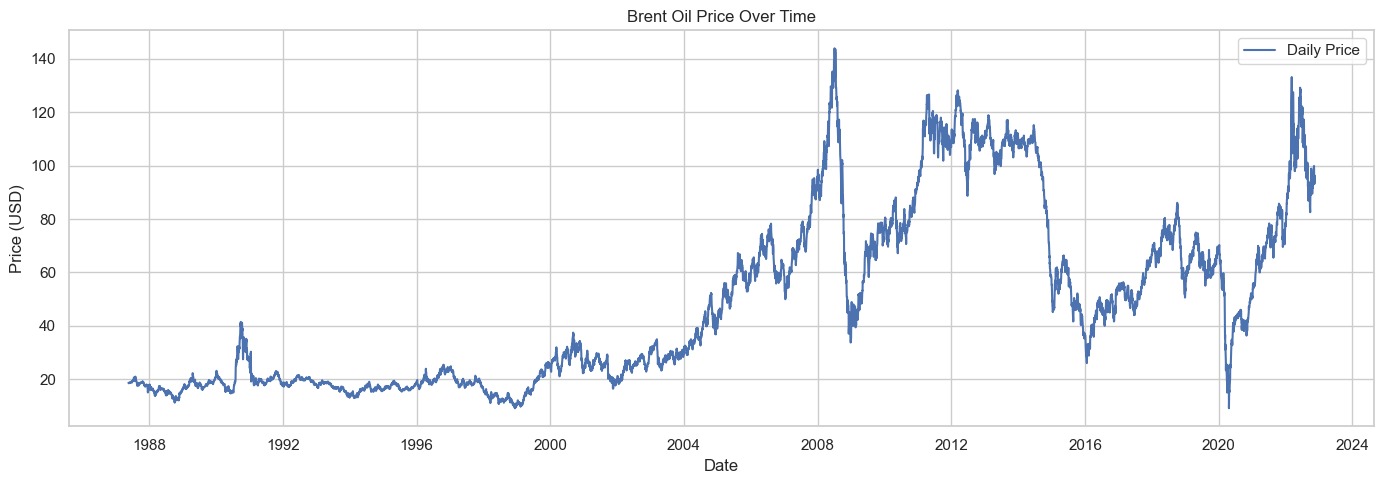

In [14]:
# Plot Price Over Time
plt.figure(figsize=(14, 5))
plt.plot(df['Price'], label='Daily Price')
plt.title("Brent Oil Price Over Time")
plt.ylabel("Price (USD)")
plt.xlabel("Date")
plt.legend()
plt.tight_layout()
plt.show()

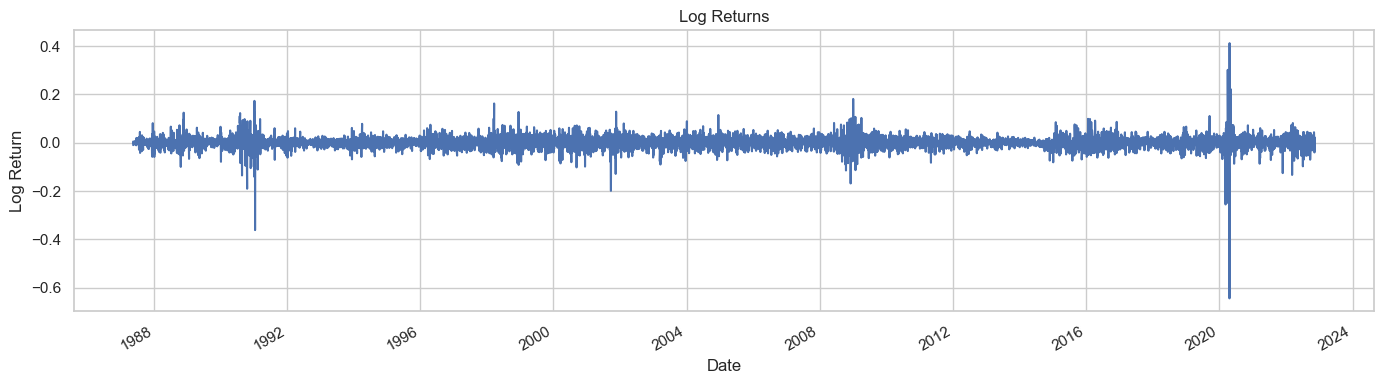

In [15]:
# Calculate Log Returns
df['log_return'] = np.log(df['Price'] / df['Price'].shift(1))
df['log_return'].dropna().plot(figsize=(14, 4), title="Log Returns")
plt.ylabel("Log Return")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

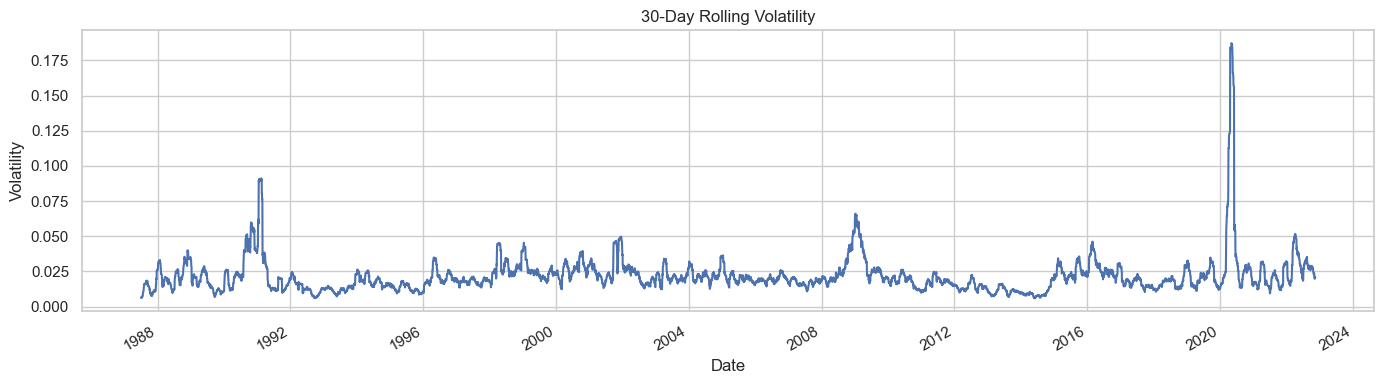

In [16]:
# Rolling Volatility (30-day)
df['volatility_30d'] = df['log_return'].rolling(window=30).std()
df['volatility_30d'].plot(figsize=(14, 4), title='30-Day Rolling Volatility')
plt.ylabel("Volatility")
plt.tight_layout()
plt.show()

In [17]:
# ADF Test on Price
adf_price = adfuller(df['Price'].dropna())
print("ADF Statistic (Price):", adf_price[0])
print("p-value:", adf_price[1])

ADF Statistic (Price): -1.9938560113924675
p-value: 0.28927350489340287


In [18]:
# ADF Test on Log Returns
adf_return = adfuller(df['log_return'].dropna())
print("ADF Statistic (Log Return):", adf_return[0])
print("p-value:", adf_return[1])

ADF Statistic (Log Return): -16.42711349448591
p-value: 2.4985801611427818e-29


In [19]:
# Save cleaned version
df.to_csv("../data/cleaned/cleaned_brentoil_data.csv")
df.head()

,Price,log_return,volatility_30d
Date,,,
1987-05-20,18.63,NaN,NaN
1987-05-21,18.45,-0.009709,NaN
1987-05-22,18.55,0.005405,NaN
1987-05-25,18.60,0.002692,NaN
1987-05-26,18.63,0.001612,NaN
